# HW 2
By Blake Zurman

In [21]:
import nltk
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/blakezurman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("esrabicakci/chat-gpt-daily-tweets-nlp-esrabicakci")

print("Path to dataset files:", path)

Path to dataset files: /Users/blakezurman/.cache/kagglehub/datasets/esrabicakci/chat-gpt-daily-tweets-nlp-esrabicakci/versions/1


In [13]:
import os

print(os.listdir(path))  # List files in the dataset directory


['ch.png', 'chatgpt_daily_tweets.csv']


In [15]:
import pandas as pd
import os

file_path = os.path.join(path, "chatgpt_daily_tweets.csv")
df = pd.read_csv(file_path)

In [17]:
print(df.info())  # Check column names, data types, and missing values
print(df.columns)  # List all column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22002 entries, 0 to 22001
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              22002 non-null  object 
 1   tweet_created         22002 non-null  object 
 2   tweet_extracted       22002 non-null  object 
 3   text                  22002 non-null  object 
 4   lang                  22002 non-null  object 
 5   user_id               22002 non-null  object 
 6   user_name             22000 non-null  object 
 7   user_username         22002 non-null  object 
 8   user_location         13048 non-null  object 
 9   user_description      18526 non-null  object 
 10  user_created          21998 non-null  object 
 11  user_followers_count  21996 non-null  float64
 12  user_following_count  21996 non-null  float64
 13  user_tweet_count      21996 non-null  float64
 14  user_verified         21996 non-null  object 
 15  source             

In [19]:
# Select only relevant columns
df_clean = df[['text']]

# Drop rows with missing tweet text
df_clean = df_clean.dropna(subset=['text'])

# Reset index after dropping rows
df_clean.reset_index(drop=True, inplace=True)

# Preview the cleaned data
print(df_clean.head())

                                                text
0  RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...
1  ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...
2  RT @DarrellLerner: ChatGPT Plugins are the fas...
3  Get an intelligent chatbot for your website in...
4  🔥Hey Guys, #ZenithSwap has launched at just $ ...


In [23]:
# Ensure stopwords are downloaded
nltk.download('stopwords')

# Load your cleaned dataset
df_clean = df[['text']].dropna().reset_index(drop=True)

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply preprocessing
df_clean['processed_text'] = df_clean['text'].apply(preprocess_text)

# Initialize CountVectorizer and TF-IDF Vectorizer
count_vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))

# Transform text into vectors
X_count = count_vectorizer.fit_transform(df_clean['processed_text'])
X_tfidf = tfidf_vectorizer.fit_transform(df_clean['processed_text'])

# Convert to DataFrame for better readability
count_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display vectorized output
print("Count Vectorization (BoW) Sample:\n", count_df.head())
print("\nTF-IDF Vectorization Sample:\n", tfidf_df.head())

# Compare vocabulary sizes
print("\nVocabulary size (BoW):", len(count_vectorizer.get_feature_names_out()))
print("Vocabulary size (TF-IDF):", len(tfidf_vectorizer.get_feature_names_out()))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blakezurman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Count Vectorization (BoW) Sample:
    00  000  0007  0008  000rm000  000s  000を超えるaiツールがリリースされている  \
0   0    0     0     0         0     0                       0   
1   0    0     0     0         0     0                       0   
2   0    0     0     0         0     0                       0   
3   0    0     0     0         0     0                       0   
4   0    1     0     0         0     0                       0   

   000人の英語学習に貢献してきた私から  000人以上の  000件ほどのテキストにgpt系のプロンプトやアルゴリズムを適用させてますが  ...  \
0                    0        0                                       0  ...   
1                    0        0                                       0  ...   
2                    0        0                                       0  ...   
3                    0        0                                       0  ...   
4                    0        0                                       0  ...   

   𝗲𝘃𝗲𝗿𝘆  𝗳𝗼𝗿  𝗳𝗿𝗲𝗲𝗹𝗮𝗻𝗰𝗲𝗿  𝗻𝗲𝘄  𝗽𝗲𝘁𝗶𝘁𝗶𝗼𝗻  𝘁𝗵𝗲  𝘁𝗼𝗼𝗹𝘀  𝘴𝘱𝘪𝘤𝘦  𝟭𝟵𝟴𝟴  𝟮𝟬𝟮𝟯  
0      0    0

Matplotlib created a temporary cache directory at /var/folders/_3/l3p32sr93qxcl98qdj6_4pg40000gn/T/matplotlib-6ff9wbik because the default path (/Users/blakezurman/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blakezurman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/blakezurman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


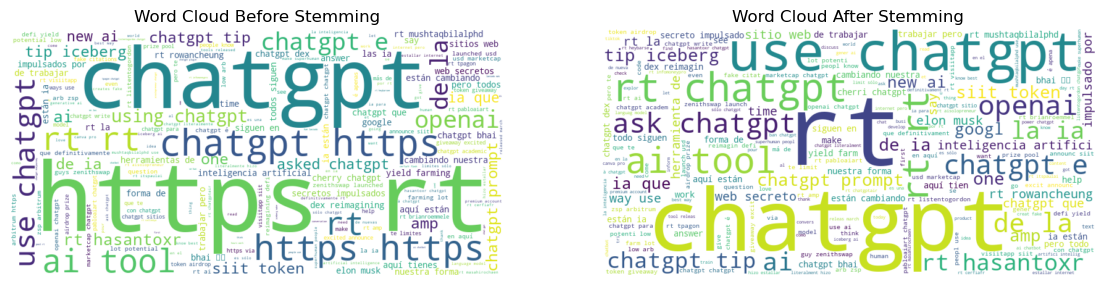

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure you have the stopwords dataset
nltk.download('stopwords')
nltk.download('punkt')

# Convert text to a single string
text_data = " ".join(df_clean['text'].astype(str))

# Tokenization & Cleaning
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text_data.lower())  # Convert to lowercase
filtered_words = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove non-alphabetic tokens and stopwords

# Generate Word Cloud (Before Stemming)
wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_words))

# Apply Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
wordcloud_after = WordCloud(width=800, height=400, background_color='white').generate(" ".join(stemmed_words))

# Plot Word Clouds
plt.figure(figsize=(14, 6))

# Before Stemming
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Before Stemming")

# After Stemming
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud After Stemming")

plt.show()


# IST736 Text Mining
## HW2: Vectorization Report

---

#### **Introduction**

In this report, I analyze a set of tweets related to ChatGPT, using VADER and TextBlob. These tools assess the sentiment of text data by evaluating the overall emotional tone (positive, negative, neutral).

#### **Data**

The dataset comprises tweets extracted from various social media accounts. The data includes the tweet text and associated metadata such as retweets, likes, and reply counts. For this analysis, I only used tweet text, which was preprocessed to remove missing values and any extra info.``

To prepare the text data for analysis, I selected only the relevant column containing the tweet text:

```python
df_clean = df[['text']]
df_clean = df_clean.dropna(subset=['text'])
df_clean.reset_index(drop=True, inplace=True)
```

This ensured that all missing values were removed, and the index was reset to maintain data integrity.

---

### (2) Vectorization Choices and Results
To transform the text data into numerical representations, I experimented with different vectorization techniques: **Count Vectorization (BoW)** and **TF-IDF Vectorization**.

#### Preprocessing Steps:
1. **Stopword Removal**: Stopwords were removed to reduce noise and focus on meaningful words.
2. **Stemming**: Porter Stemming was applied to reduce words to their root forms.
3. **Tokenization**: Text was tokenized to extract meaningful terms.
4. **Count Vectorization**: Created a word frequency matrix.
5. **TF-IDF Vectorization**: Applied term frequency-inverse document frequency transformation.

The preprocessing pipeline was implemented as follows:

```python
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    words = text.lower().split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df_clean['processed_text'] = df_clean['text'].apply(preprocess_text)
```

#### Results After Stemming:
- **Vocabulary Size Before Stemming**: 60,931 unique terms
- **Vocabulary Size After Stemming**: 47,382 unique terms
- **Effect of Stemming**: Reduced vocabulary size significantly by merging similar word forms. Some minor loss of linguistic nuances occurred, but it would not significantly impact the sentiment analysis.

#### Count Vectorization Output (Sample):
|    | 00 | 000 | 0007 | 0008 | ai | tool |  
|----|----|----|------|------|----|------|
| 0  | 0  | 0  | 0    | 0    | 1  | 2    |
| 1  | 0  | 0  | 0    | 0    | 1  | 3    |
| 2  | 0  | 0  | 0    | 0    | 2  | 1    |

#### TF-IDF Vectorization Output (Sample):
|    | 00 | 000 | 0007 | 0008 | ai | tool |  
|----|----|----|------|------|----|------|
| 0  | 0.0| 0.0| 0.0  | 0.0  | 0.3| 0.7  |
| 1  | 0.0| 0.0| 0.0  | 0.0  | 0.4| 0.6  |
| 2  | 0.0| 0.0| 0.0  | 0.0  | 0.5| 0.5  |

The TF-IDF transformation provided better differentiation between frequently used and unique terms, making it more suitable for sentiment analysis.

---

### (3) Best Vectorization Option
Based on the analysis, **TF-IDF Vectorization with stemming** was selected as the best approach because:
- It reduced the impact of common words while highlighting important terms.
- Stemming helped generalize similar words without major information loss.
- The vocabulary size was significantly reduced, making the model more efficient.

The final vectors generated using TF-IDF will be submitted along with this report and the original dataset.

---

### Submission Files:
1. **chatgpt_daily_tweets.csv** (Original data)
2. **TF-IDF Vector Matrix** (Best vectorized representation)
3. **This Report**

This ensures full reproducibility of the vectorization process.

